<a href="https://colab.research.google.com/github/n9quan/QR_Colab/blob/main/WS_1.6_Descriptive_Stats_Box_plot_Outliers_Nguyen_Chinh_Quan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Learning objectives

1. Understand distribution
2. Compare theoretical distribution with histogram
3. Calculate Descriptive statistics
4. Draw boxplot and identify outliers


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import files
import io

##Compare histogram and distribution curve

Please upload the file `dice - Sheet 1.csv` that we produced and assign it to a data frame named `data`. 

In [ ]:
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded["dice - Sheet1.csv"]))

Saving dice - Sheet1.csv to dice - Sheet1 (1).csv


**Exercise**: Now combine (concatenate) the data in all columns into a single column with name `four_plus_six` using the function `pd.concat`

In [ ]:
# Insert solution here
four_plus_six = pd.concat([data["Group 1"], data["Group 2"], data["Group 3"], data["Group 4"], data["Group 5"]])

**Exercise**: Remove any NAN value in `four_plus_six` using `.dropna` function

In [ ]:
# Insert solution here
four_plus_six.dropna()

0     5.0
1     9.0
2     6.0
3     4.0
4     7.0
     ... 
24    6.0
25    4.0
26    7.0
27    8.0
28    9.0
Length: 149, dtype: float64

**Exercise**: Produce a histogram of `four_plus_six`.

(array([ 3., 14., 23., 21., 25., 31., 12., 11.,  9.]),
 array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
         6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ]),
 <BarContainer object of 9 artists>)

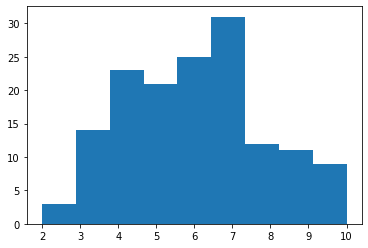

In [ ]:
# # Insert solution here
# bin_width = np.arange(2.0, 11.0, 1)
# bin_width
# four_plus_six.hist(bins = bin_width, edgecolor = "black")
# plt.title("Average temperature anomaly in Summer in the northern hemisphere (1921-1950)")
# plt.xlabel("Sum of two dices")
# plt.ylabel("Frequency")
plt.hist(four_plus_six, bins = 9, density = False)

As in the previous worksheets, `bins` specifies how many bins we would like to use. 8 is appropriate in this case to reflect the numbers from 2 to 10. The `density` parameter means that this is a realative frequency histogram (each bin will display the bin's count divided by the total number of counts and the bin width).

The next block of code will produce a graph for the theoretical distribution. 

In [ ]:
four_plus_six.value_counts()

7.0     31
6.0     25
4.0     23
5.0     21
3.0     14
8.0     12
9.0     11
10.0     9
2.0      3
dtype: int64

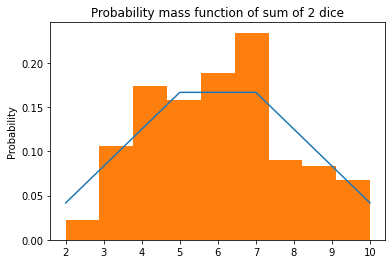

In [ ]:
prob_fps = [1/24,2/24,3/24,4/24,4/24,4/24,3/24,2/24,1/24] #this is the list of the probabilities that we calculated
value_fps = [2, 3, 4, 5, 6, 7, 8, 9, 10] # this is the list of values for the random variable

plt.plot(value_fps, prob_fps) #produce the graph of the distribution
plt.hist(four_plus_six, bins = 9, density = True) #produce the histogram
plt.ylabel('Probability') # set the title for the y-axis
plt.title('Probability mass function of sum of 2 dice') # set the title for the graphs
plt.show()

**Exercise**: [Here](https://docs.google.com/spreadsheets/d/1KY1j2QPAeB1_9HcbC3R9uUVPPAzKBqLdcDQ0bWMTGwA/edit#gid=0) is a data set of sums of two 6-face dice. Calculate the theoretical distribution for this random variable. Repeat the steps in this section to produce a comparison between the theoretical distribution and the histogram.

Upload the file to a variable named `data1`

In [ ]:
# Solution goes here
uploaded = files.upload()
data1 = pd.read_csv(io.BytesIO(uploaded["6plus6 - Sheet1.csv"]))

Saving 6plus6 - Sheet1.csv to 6plus6 - Sheet1.csv


**Exercise**: Combine the columns into a variable named `six_plus_six` and drop any 'NAN' value.

In [ ]:
# Insert solution here
data1 
six_plus_six = pd.concat([data1["Group 1"], data1["Group 2"], data1["Group 3"], data1["Group 4"], data1["Group 5"], data1["Group 6"], data1["Group 7"], data1["Group 8"], data1["Group 9"], data1["Group 10"]])
six_plus_six.dropna()

0      9.0
1      9.0
2      8.0
3      3.0
4      8.0
      ... 
38     7.0
39     3.0
40     7.0
41    10.0
42     9.0
Length: 258, dtype: float64

**Exercise**: Create the distribution graph and the histogram. Hint: You need to pin down the list of possible values and corresponding probabilities.

In [ ]:
six_plus_six.value_counts()

7.0     46
6.0     39
9.0     31
8.0     30
4.0     22
5.0     21
10.0    17
11.0    17
3.0     14
2.0     11
12.0    10
dtype: int64

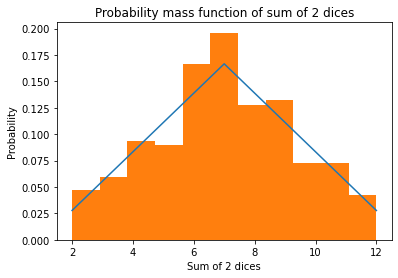

In [ ]:
# Insert solution here
prob_sps = [1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36]
value_sps = [2,3,4,5,6,7,8,9,10,11,12]
plt.plot(value_sps,prob_sps)
plt.hist(six_plus_six, bins = 11, density = True)
plt.ylabel("Probability")
plt.xlabel("Sum of 2 dices")
plt.title("Probability mass function of sum of 2 dices")
plt.show()

##Descriptive Statistics 

Our next data set will contain some health related information. Please download the file `cardio_train.csv` from this [link](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset), upload it, and assign it to a variable named `cardio`. You may want to print out the file to see the columns and read the description on Kaggle to understand the data better.

Note: If you have trouble uploading the file in certain browsers, please try uploading it through Chrome instead.

In [ ]:
uploaded = files.upload()
cardio = pd.read_csv(io.BytesIO(uploaded["cardio_train.csv"]), sep = ';')

Saving cardio_train.csv to cardio_train.csv


The first thing to do when we want to investigate a variable is to calculate the descriptive statistics. In this worksheet we will look at the `height` column. We can calculate all important statistics - mean, std, min (0%), Q1 (25%), median (50%), Q3 (75%), max (100%) - by using the function `describe`.

In [ ]:
cardio.height.describe()

count    70000.000000
mean       164.359229
std          8.210126
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

It is often more useful to see these numbers in a visual presentation called a box-and-whisker plot.

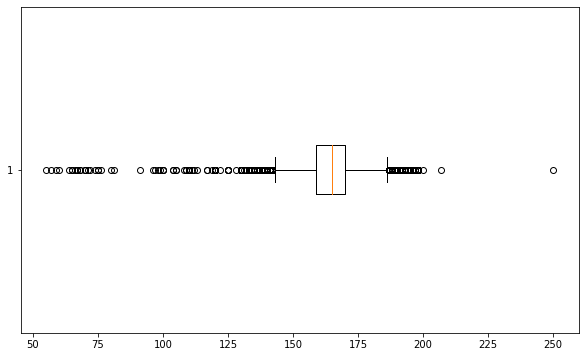

In [ ]:
plt.figure(figsize=(10,6))
plt.boxplot(cardio.height, vert = False)
plt.show()

Setting the parameter `vert` to `False` creates a horizontal boxplot. If you leave this out or set it to `True`, it will create a vertical boxplot instead.

Look at the boxplot and you can see that there are a few outliers (the dots outside of the two whiskers). Usually we want to calculate the values of these whiskers to identify the outliers. To do so, we can use the `quantile` function you are already familiar with.

**Exercise:** Calculate the values for the quantiles at 0.25, 0.5, and 0.75 of the height column and assign them to the variables `q1`, `med`, and `q3`, respectively.

In [ ]:
# Solution goes here
q1 = cardio.quantile(0.25)
med = cardio.quantile(0.5)
q3 = cardio.quantile(0.75)

In [ ]:
cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


We can then calculate the lower and upper whiskers.

In [ ]:
lower_whisker = q1 - (1.5 * (q3-q1)) # calculate the lower whisker
upper_whisker = q3 + (1.5 * (q3-q1)) # calculate the upper whisker
print(lower_whisker, upper_whisker)

id            -49817.0
age            12169.5
gender            -0.5
height           142.5
weight            39.5
ap_hi             90.0
ap_lo             65.0
cholesterol       -0.5
gluc               1.0
smoke              0.0
alco               0.0
active             1.0
cardio            -1.5
dtype: float64 id             149713.0
age             26821.5
gender              3.5
height            186.5
weight            107.5
ap_hi             170.0
ap_lo             105.0
cholesterol         3.5
gluc                1.0
smoke               0.0
alco                0.0
active              1.0
cardio              2.5
dtype: float64


We then use the values of the whiskers to eliminate the outliers by restricting the range only from the lower whisker to the upper whisker.

**Exercise:** Use the same method as in the previous worksheets to select only the data from the `height` column that is smaller than `upper_whisker` and greater than `lower_whisker`. Assign this to a new variable called `height_clean`.

In [ ]:
lower_whisker

id            -49817.0
age            12169.5
gender            -0.5
height           142.5
weight            39.5
ap_hi             90.0
ap_lo             65.0
cholesterol       -0.5
gluc               1.0
smoke              0.0
alco               0.0
active             1.0
cardio            -1.5
dtype: float64

In [ ]:
# Solution goes here
height_clean = cardio[(cardio["height"] >= lower_whisker['height']) & (cardio["height"] <= upper_whisker['height'])]

**Exercise**: Now create the boxplot for `height_clean`. You will see that the data does not have any outlier anymore.

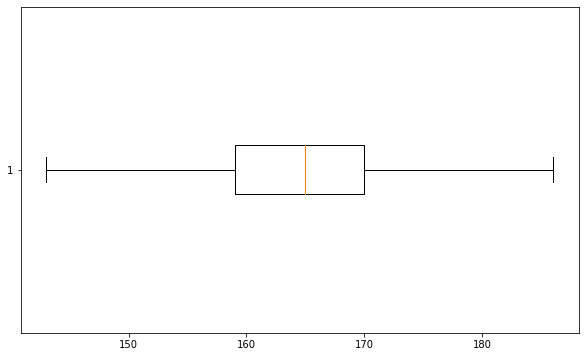

In [ ]:
#Solution goes here
plt.figure(figsize=(10,6))
plt.boxplot(height_clean.height, vert = False)
plt.show()